# Linear Regression Analysis

### Stephen Koch - 12.17.2019

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in insurance data

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
X = df
X

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
Y = df.iloc[500:600:20, :-3:2]
Y

,age,bmi
500,29,34.40
520,50,27.36
540,34,38.00
560,46,19.95
580,59,25.46


#### Display info on insurance data

In [7]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Plot data to a graph

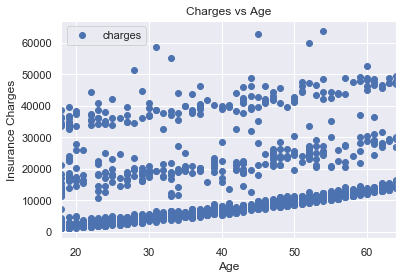

In [10]:
df.plot(x='age', y='charges', style='o')
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

#### Assigning x and y values for regression

In [11]:
X = df['age'].values
y = df['charges'].values

In [12]:
X = X.reshape(-1, 1)

#### Using a regression model, split data into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(regressor.intercept_)

3882.8586788884386


In [16]:
print(regressor.coef_)

[238.37156961]


In [17]:
y_pred = regressor.predict(X_test)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})


,Actual,Predicted
0,9724.53000,16278.180298
1,8547.69130,15086.322450
2,45702.02235,15324.694020
3,12950.07120,18423.524425
4,9644.25250,16039.808729
...,...,...
263,15019.76005,18661.895995
264,6664.68595,13656.093033
265,20709.02034,17470.038146
266,40932.42950,11034.005767


#### Plot linear regression

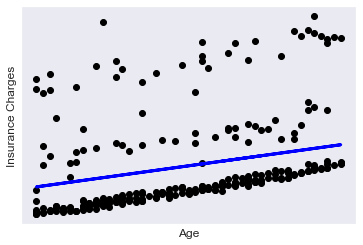

In [18]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Insurance Charges')

plt.xticks(())
plt.yticks(())

plt.show()

### The older the person the higher their insurance charges

In [19]:
X2 = df['bmi'].values
y2 = df['children'].values
X2 = X2.reshape(-1,1)


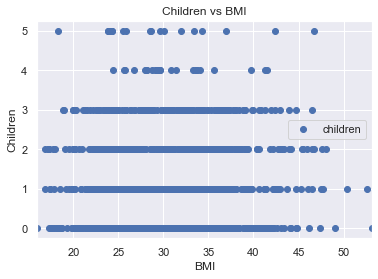

In [20]:
df.plot(x='bmi', y='children', style='o')
plt.title('Children vs BMI')
plt.xlabel('BMI')
plt.ylabel('Children')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y2_pred = regressor.predict(X2_test)

In [24]:
pd.DataFrame({'Actual':y2_test, 'Predicted':y2_pred})

,Actual,Predicted
0,1,1.077353
1,1,1.074074
2,2,1.118305
3,0,1.109672
4,0,1.029348
...,...,...
263,2,1.078518
264,1,1.070261
265,0,1.117179
266,3,1.112320


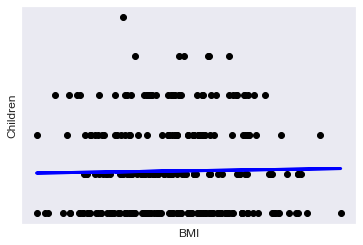

In [25]:
plt.scatter(X2_test, y2_test,  color='black')
plt.plot(X2_test, y2_pred, color='blue', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Children')

plt.xticks(())
plt.yticks(())

plt.show()

### Almost no relationship to the number of children and paitent BMI

In [26]:
X3 = df['age'].values
y3 = df['bmi'].values
X3 = X3.reshape(-1,1)

In [27]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y3_pred = regressor.predict(X2_test)

In [30]:
pd.DataFrame({'Actual':y3_test, 'Predicted':y3_pred})

,Actual,Predicted
0,30.200,30.290010
1,29.370,30.249120
2,40.565,30.800644
3,38.380,30.692999
4,18.050,29.691438
...,...,...
263,30.495,30.304543
264,28.405,30.201579
265,40.280,30.786603
266,39.050,30.726007


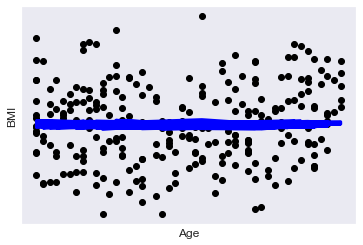

In [31]:
plt.scatter(X3_test, y3_test,  color='black')
plt.plot(X3_test, y3_pred, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('BMI')

plt.xticks(())
plt.yticks(())

plt.show()

### No relation between age and BMI

In [32]:
import seaborn as sns

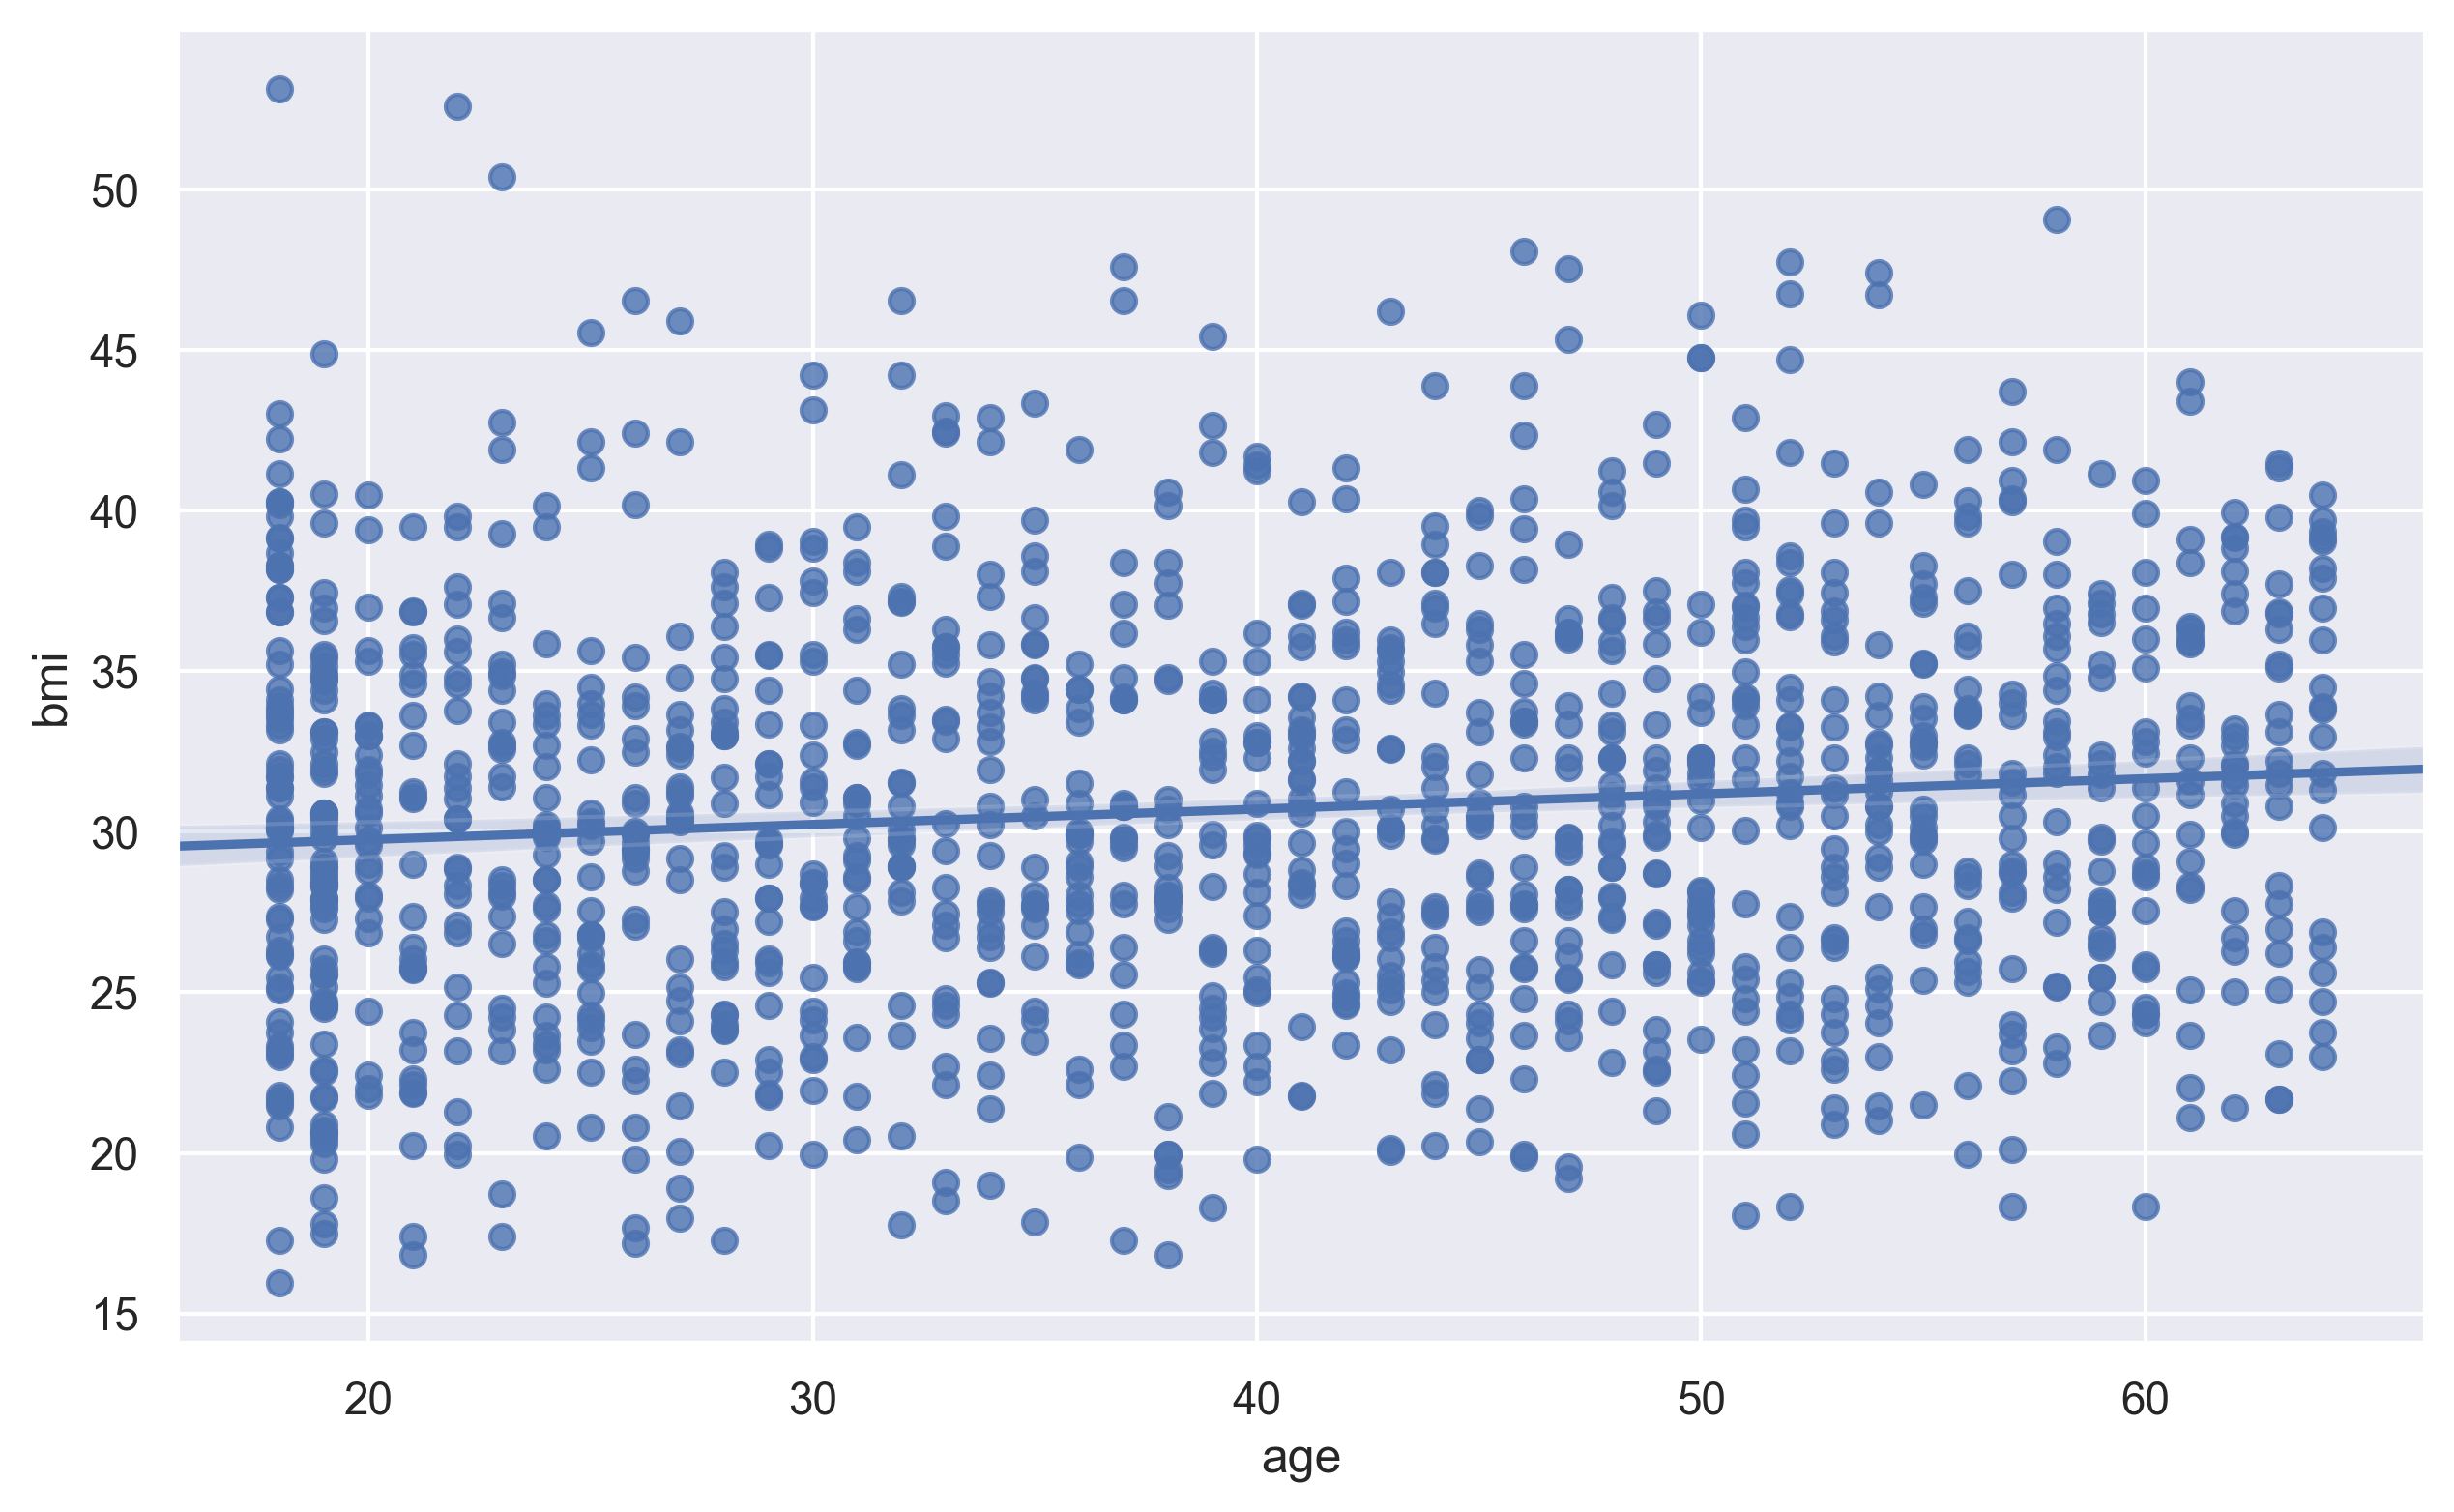

In [34]:
sns.set()
plt.figure(figsize=(10,6), dpi=300)
sns.regplot(x='age', y='bmi', data=df)